## Evaluation with plots


In [1]:
import numpy as np
from texttable import Texttable
import latextable
import matplotlib.pyplot as plt
from glob import glob

## Wordnet evaluation

#### Hypernym relation

In [2]:
# Load the results

models = ["bert", "electra"]
kb = "wn"


precisions_models = {}
recall_models = {}
mrr_models = {}

for model in models:
    main_folder = f'/Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/{model}/{kb}'

    precisions = []
    recalls = []
    mrrs = []

    for file in glob(main_folder+'/**/*.txt'):
        print(f'File: {file}')
        
        #print(file.split("\\")[-2])
        type_relation = file.split("\\")[-2]


        with open(file, 'r', encoding="utf8") as f:
            lines = f.readlines()

            precs_text = lines[:4]
            
            prec_rel_k = []
            for line in precs_text:
                split = line.strip().split(": ")
                prec_v = round(float(split[1]), 2)
                prec_rel_k.append(prec_v)


            recalls_text = lines[6:10]

            recall_rel_k = []
            for line in recalls_text:
                split = line.strip().split(": ")
                recall_v = round(float(split[1]), 2)
                recall_rel_k.append(recall_v)

            mrr_text = lines[18] # line is mrr
            split = mrr_text.strip().split(": ")
            mrr = round(float(split[1]), 2)


        precisions.append((type_relation, prec_rel_k))

        recalls.append((type_relation, recall_rel_k))

        mrrs.append((type_relation, mrr))

    precisions_models[model] = precisions
    recall_models[model] = recalls
    mrr_models[model] = mrrs


print(precisions_models)
print(recall_models)
print(mrr_models)



File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/wn\is_a\hypernym_sents_masked_first_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/wn\specific_term\hypernym_sents_masked_first_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/bert/wn\such_as\hypernym_sents_masked_first_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/wn\is_a\hypernym_sents_masked_first_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/wn\specific_term\hypernym_sents_masked_first_20.txt
File: /Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/electra/wn\such_as\hypernym_sents_masked_first_20.txt
{'bert': [('is_a', [0.15, 0.24, 0.37, 0.44]), ('specific_term', [0.17, 0.28, 0.38, 0.44]), ('such_as', [0.18, 0.28, 0.38, 0.45])], 'electra': [('is_a', [0.06, 0.07, 0.17, 0.27]), ('specific_term', [0.02, 0.02, 0.1, 0.19]), ('such_as', [0.11, 0.17, 0.26, 0.32])]}
{'bert': [('is_a', [0.11, 0.2, 0.34, 0.42]), ('specific_term',

### PRECISION@K

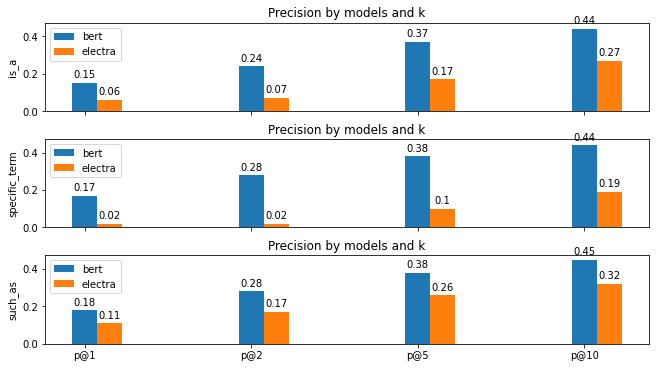

In [3]:
#fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(18, 10))

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(9, 5))

width = 0.15  # the width of the bars

models = tuple(models) # ci sono i modelli utilizzati 

relations = ("is_a", "specific_term", "such_as") # ci sono i tipi di relazione utilizzati 

labels = ("p@1", "p@2", "p@5", "p@10") # ci sono i valori di k utilizzati

x = np.arange(len(labels))  # the label of precision

for (i, j) in enumerate([0, 1, 2]):
    

    rects1 = axes[j].bar(x, precisions_models[models[0]][i][1], width, label=models[0])
    axes[j].bar_label(rects1, padding=3)
    
    rects2 = axes[j].bar(x + width, precisions_models[models[1]][i][1], width, label=models[1])
    axes[j].bar_label(rects2, padding=3)

    #rects3 = axes[j].bar(x + 2*width, precisions_models[models[2]][i][1], width, label=models[2])
    #axes[j].bar_label(rects3, padding=3)

    #rects4 = axes[j].bar(x + 3*width, precisions_models[models[3]][i][1], width, label=models[3])
    #axes[j].bar_label(rects4, padding=3)


    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[j].set_ylabel(precisions_models[models[0]][i][0])
    axes[j].set_title('Precision by models and k')
    axes[j].set_xticks(x, labels)
    axes[j].legend()


plt.show()

### RECALL@K

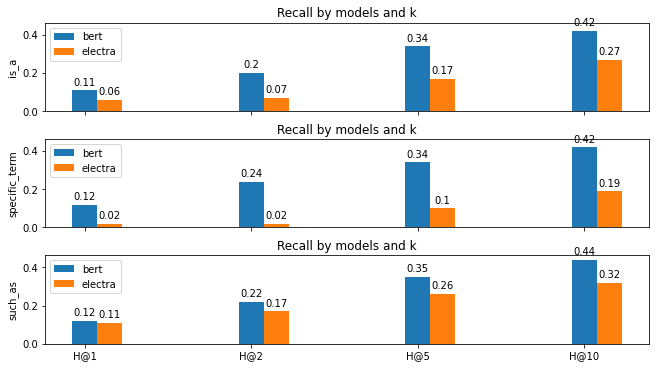

In [4]:
#fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(18, 10))

fig, axes = plt.subplots(3, 1, sharex=True, sharey=True, layout="constrained", figsize=(9, 5))

width = 0.15  # the width of the bars

models = tuple(models) # ci sono i modelli utilizzati 

relations = ("is_a", "specific_term", "such_as") # ci sono i tipi di relazione utilizzati 

labels = ("H@1", "H@2", "H@5", "H@10") # ci sono i valori di k utilizzati

x = np.arange(len(labels))  # the label of precision

for (i, j) in enumerate([0, 1, 2]):    

    rects1 = axes[j].bar(x, recall_models[models[0]][i][1], width, label=models[0])
    axes[j].bar_label(rects1, padding=3)
    
    rects2 = axes[j].bar(x + width, precisions_models[models[1]][i][1], width, label=models[1])
    axes[j].bar_label(rects2, padding=3)

    #rects3 = axes[j].bar(x + 2*width, precisions_models[models[2]][i][1], width, label=models[2])
    #axes[j].bar_label(rects3, padding=3)

    #rects4 = axes[j, k].bar(x + 3*width, precisions_models[models[3]][i][1], width, label=models[3])
    #axes[j, k].bar_label(rects4, padding=3)
    


    #rects1 = ax.bar(x - width/2, men_means, width, label='')
    #rects2 = ax.bar(x + width/2, women_means, width, label='')


    # Add some text for labels, title and custom x-axis tick labels, etc.
    axes[j].set_ylabel(recall_models[models[0]][i][0])
    axes[j].set_title('Recall by models and k')
    axes[j].set_xticks(x, labels)
    axes[j].legend()


plt.show()

### MRR

In [5]:
table = Texttable()
table.set_cols_align(["m", "m", "m"])
table.add_row(["Experiment", "MRR-BERT", "MRR-ELECTRA"])

for (experiment, value_bert), (_, value_electra) in zip(mrr_models["bert"], mrr_models["electra"]):
    table.add_row([experiment, value_bert, value_electra])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------------+----------+-------------+
| Experiment    | MRR-BERT | MRR-ELECTRA |
+---------------+----------+-------------+
| is_a          | 0.160    | 0.070       |
+---------------+----------+-------------+
| specific_term | 0.170    | 0.050       |
+---------------+----------+-------------+
| such_as       | 0.160    | 0.110       |
+---------------+----------+-------------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|m|m|m|}
			\hline
			 \\
			\hline
			Experiment & MRR-BERT & MRR-ELECTRA \\
			\hline
			is_a & 0.160 & 0.070 \\
			\hline
			specific_term & 0.170 & 0.050 \\
			\hline
			such_as & 0.160 & 0.110 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


#### Hyponym relation

In [6]:
# Load the results

models = ["bert", "electra"]
kb = "wn"
name_file = "hyponym_sents_masked_first_20.txt"

precisions_models = {}
recall_models = {}
mrr_models = {}

for model in models:
    file = f'/Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/{model}/{kb}/{name_file}'

    precisions = []
    recalls = []
    mrrs = []

    with open(file, 'r', encoding="utf8") as f:
        lines = f.readlines()

        precs_text = lines[:4]
        
        prec_rel_k = []
        for line in precs_text:
            split = line.strip().split(": ")
            prec_v = round(float(split[1]), 2)
            prec_rel_k.append(prec_v)


        recalls_text = lines[6:10]

        recall_rel_k = []
        for line in recalls_text:
            split = line.strip().split(": ")
            recall_v = round(float(split[1]), 2)
            recall_rel_k.append(recall_v)

        mrr_text = lines[18] # line is mrr
        split = mrr_text.strip().split(": ")
        mrr = round(float(split[1]), 2)


        precisions.extend(prec_rel_k)

        recalls.extend(recall_rel_k)

        mrrs.append(mrr)

    precisions_models[model] = precisions
    recall_models[model] = recalls
    mrr_models[model] = mrrs


print(precisions_models)
print(recall_models)
print(mrr_models)



{'bert': [0.26, 0.33, 0.41, 0.47], 'electra': [0.19, 0.25, 0.34, 0.38]}
{'bert': [0.25, 0.32, 0.4, 0.47], 'electra': [0.18, 0.24, 0.33, 0.38]}
{'bert': [0.12], 'electra': [0.1]}


### PRECISION@k


In [7]:
table = Texttable()
table.set_cols_align(["l", "m", "m", "m", "m"])
table.add_row(["Model", "p@1", "p@2", "p@5", "p@10"])

for model in models:
    
    precs = precisions_models[model]
    
    table.add_row([model.upper(), precs[0], precs[1], precs[2], precs[3]])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------+-------+-------+-------+-------+
| Model   | p@1   | p@2   | p@5   | p@10  |
+---------+-------+-------+-------+-------+
| BERT    | 0.260 | 0.330 | 0.410 | 0.470 |
+---------+-------+-------+-------+-------+
| ELECTRA | 0.190 | 0.250 | 0.340 | 0.380 |
+---------+-------+-------+-------+-------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|l|m|m|m|m|}
			\hline
			 \\
			\hline
			Model & p@1 & p@2 & p@5 & p@10 \\
			\hline
			BERT & 0.260 & 0.330 & 0.410 & 0.470 \\
			\hline
			ELECTRA & 0.190 & 0.250 & 0.340 & 0.380 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


### RECALL@k

In [8]:
table = Texttable()
table.set_cols_align(["l", "m", "m", "m", "m"])
table.add_row(["Model", "H@1", "H@2", "H@5", "H@10"])

for model in models:
    
    recalls = recall_models[model]
    
    table.add_row([model.upper(), recalls[0], recalls[1], recalls[2], recalls[3]])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------+-------+-------+-------+-------+
| Model   | H@1   | H@2   | H@5   | H@10  |
+---------+-------+-------+-------+-------+
| BERT    | 0.250 | 0.320 | 0.400 | 0.470 |
+---------+-------+-------+-------+-------+
| ELECTRA | 0.180 | 0.240 | 0.330 | 0.380 |
+---------+-------+-------+-------+-------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|l|m|m|m|m|}
			\hline
			 \\
			\hline
			Model & H@1 & H@2 & H@5 & H@10 \\
			\hline
			BERT & 0.250 & 0.320 & 0.400 & 0.470 \\
			\hline
			ELECTRA & 0.180 & 0.240 & 0.330 & 0.380 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


### MRR

In [9]:
table = Texttable()
table.set_cols_align(["l", "m"])
table.add_row(["Model", "MRR"])

for model in models:
    
    mrr = mrr_models[model]
    
    table.add_row([model.upper(), mrr[0]])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------+-------+
| Model   | MRR   |
+---------+-------+
| BERT    | 0.120 |
+---------+-------+
| ELECTRA | 0.100 |
+---------+-------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|l|m|}
			\hline
			 \\
			\hline
			Model & MRR \\
			\hline
			BERT & 0.120 \\
			\hline
			ELECTRA & 0.100 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


#### Part meronym relation

In [10]:
# Load the results

models = ["bert", "electra"]
kb = "wn"
name_file = "part_meronym_sents_masked_first_20.txt"

precisions_models = {}
recall_models = {}
mrr_models = {}

for model in models:
    file = f'/Users/128525/Desktop/Uni/SemGPT/it/unito/evaluation/{model}/{kb}/{name_file}'

    precisions = []
    recalls = []
    mrrs = []

    with open(file, 'r', encoding="utf8") as f:
        lines = f.readlines()

        precs_text = lines[:4]
        
        prec_rel_k = []
        for line in precs_text:
            split = line.strip().split(": ")
            prec_v = round(float(split[1]), 2)
            prec_rel_k.append(prec_v)


        recalls_text = lines[6:10]

        recall_rel_k = []
        for line in recalls_text:
            split = line.strip().split(": ")
            recall_v = round(float(split[1]), 2)
            recall_rel_k.append(recall_v)

        mrr_text = lines[18] # line is mrr
        split = mrr_text.strip().split(": ")
        mrr = round(float(split[1]), 2)


        precisions.extend(prec_rel_k)

        recalls.extend(recall_rel_k)

        mrrs.append(mrr)

    precisions_models[model] = precisions
    recall_models[model] = recalls
    mrr_models[model] = mrrs


print(precisions_models)
print(recall_models)
print(mrr_models)

{'bert': [0.15, 0.2, 0.28, 0.35], 'electra': [0.11, 0.14, 0.19, 0.23]}
{'bert': [0.13, 0.17, 0.25, 0.33], 'electra': [0.09, 0.12, 0.17, 0.22]}
{'bert': [0.1], 'electra': [0.07]}


### PRECISION@k

In [11]:
table = Texttable()
table.set_cols_align(["l", "m", "m", "m", "m"])
table.add_row(["Model", "p@1", "p@2", "p@5", "p@10"])

for model in models:
    
    precs = precisions_models[model]
    
    table.add_row([model.upper(), precs[0], precs[1], precs[2], precs[3]])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------+-------+-------+-------+-------+
| Model   | p@1   | p@2   | p@5   | p@10  |
+---------+-------+-------+-------+-------+
| BERT    | 0.150 | 0.200 | 0.280 | 0.350 |
+---------+-------+-------+-------+-------+
| ELECTRA | 0.110 | 0.140 | 0.190 | 0.230 |
+---------+-------+-------+-------+-------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|l|m|m|m|m|}
			\hline
			 \\
			\hline
			Model & p@1 & p@2 & p@5 & p@10 \\
			\hline
			BERT & 0.150 & 0.200 & 0.280 & 0.350 \\
			\hline
			ELECTRA & 0.110 & 0.140 & 0.190 & 0.230 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


### RECALL@k

In [12]:
table = Texttable()
table.set_cols_align(["l", "m", "m", "m", "m"])
table.add_row(["Model", "H@1", "H@2", "H@5", "H@10"])

for model in models:
    
    recalls = recall_models[model]
    
    table.add_row([model.upper(), recalls[0], recalls[1], recalls[2], recalls[3]])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------+-------+-------+-------+-------+
| Model   | H@1   | H@2   | H@5   | H@10  |
+---------+-------+-------+-------+-------+
| BERT    | 0.130 | 0.170 | 0.250 | 0.330 |
+---------+-------+-------+-------+-------+
| ELECTRA | 0.090 | 0.120 | 0.170 | 0.220 |
+---------+-------+-------+-------+-------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|l|m|m|m|m|}
			\hline
			 \\
			\hline
			Model & H@1 & H@2 & H@5 & H@10 \\
			\hline
			BERT & 0.130 & 0.170 & 0.250 & 0.330 \\
			\hline
			ELECTRA & 0.090 & 0.120 & 0.170 & 0.220 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}


### MRR

In [13]:
table = Texttable()
table.set_cols_align(["l", "m"])
table.add_row(["Model", "MRR"])

for model in models:
    
    mrr = mrr_models[model]
    
    table.add_row([model.upper(), mrr[0]])


print(table.draw())
print('\nLatextable Output:')
print(latextable.draw_latex(table, caption="An example table.", label="table:example_table"))

+---------+-------+
| Model   | MRR   |
+---------+-------+
| BERT    | 0.100 |
+---------+-------+
| ELECTRA | 0.070 |
+---------+-------+

Latextable Output:
\begin{table}
	\begin{center}
		\begin{tabular}{|l|m|}
			\hline
			 \\
			\hline
			Model & MRR \\
			\hline
			BERT & 0.100 \\
			\hline
			ELECTRA & 0.070 \\
			\hline
		\end{tabular}
	\end{center}
	\caption{An example table.}
	\label{table:example_table}
\end{table}
